# Breast Cancer Wisconsin (Diagnostic) Dataset - Visual Exploration

This notebook provides a well-documented, visually-rich exploration of the **Breast Cancer Wisconsin (Diagnostic)** dataset.
We aim to analyze and visualize the structure, class distribution, and feature types using clear visualizations.

**Key points:**
- The dataset includes features computed from digitized images of fine needle aspirates (FNA) of breast masses.
- The target variable is `diagnosis`: **Malignant (M)** or **Benign (B)**.
- Each tumor sample is described by 30 numeric features, each calculated as **mean**, **standard error (se)**, and **worst** value.

# Install kagglehub to access the dataset directly from Kaggle

In [18]:
!pip install kagglehub

### Dataset Download

We use `kagglehub` to download the Breast Cancer Wisconsin (Diagnostic) dataset directly from Kaggle. 
This ensures we are working with the latest available version.

In [150]:
import kagglehub

# Downloads and returns the local path
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\miris\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


### Dataset Preview

We display the first 10 rows of the dataset to examine its structure, observe example values, and verify that the data has been loaded correctly.


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from local KaggleHub cache path
file_path = r"C:\Users\miris\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv"

df = pd.read_csv(file_path)

# Display the first few rows
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

### Dataset Structure

We examine the overall shape of the dataset and use `.info()` to review the data types and identify any potential missing values.


In [194]:
# Check dataset shape and summary information
print("Dataset shape:", df.shape)
# Drop the empty 'Unnamed: 32' column if it exists
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# Verify the column is removed
print("Columns after dropping 'Unnamed: 32':")
print(df.columns)

df.info()

Dataset shape: (569, 32)
Columns after dropping 'Unnamed: 32':
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis      

### Feature Distribution Skewness

We compute the skewness of each numerical feature to assess the symmetry of their distributions. This helps identify variables that may require transformation before statistical analysis or modeling.


In [195]:
df.skew(numeric_only=True).sort_values(ascending=False)

id                         6.473752
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0

### Class Distribution: Malignant vs. Benign

We analyze the distribution of the target variable, `diagnosis`, to understand the balance between malignant (M) and benign (B) tumor cases. This is essential for evaluating class imbalance and guiding further analysis.


Malignant cases (M): 212
Benign cases (B): 357


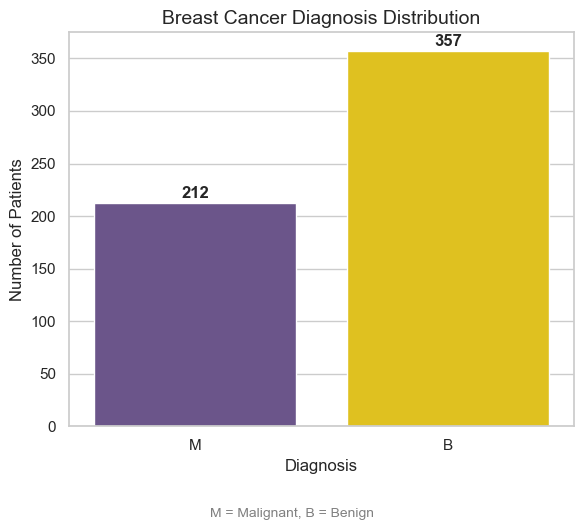

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Get class counts
class_counts = df['diagnosis'].value_counts()
benign_count = class_counts.get('B', 0)
malignant_count = class_counts.get('M', 0)

# Print summary before the plot
print(f"Malignant cases (M): {malignant_count}")
print(f"Benign cases (B): {benign_count}")

# Create the plot
plt.figure(figsize=(6, 5))
custom_palette = [ '#6A4C93', '#FFD700']  
ax = sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette = custom_palette, legend=False)

# Add value labels above bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f"{count}", (x, y + 5), ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Breast Cancer Diagnosis Distribution', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['M', 'B'], fontsize=11)
plt.yticks(fontsize=11)

# Add caption
plt.figtext(0.5, -0.05, "M = Malignant, B = Benign", wrap=True,
            horizontalalignment='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

### Diagnosis Distribution – Percentage View

To complement the count-based bar chart, we present a pie chart showing the percentage distribution of benign and malignant cases. This offers an intuitive view of the class imbalance and helps reinforce the understanding of dataset proportions.


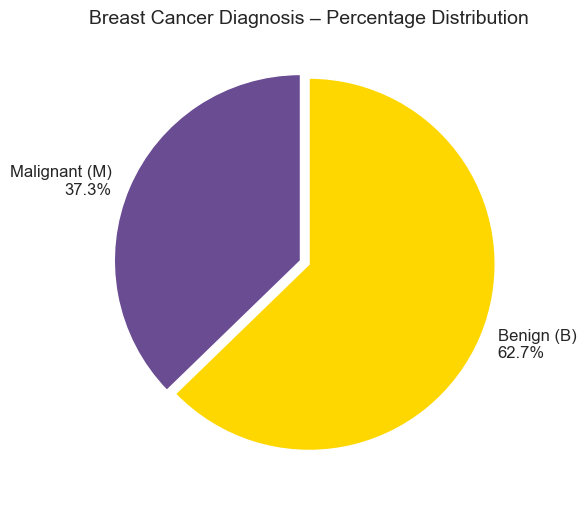

In [212]:
# Pie chart showing class distribution in percentages
labels = ['Benign (B)', 'Malignant (M)']
sizes = [benign_count, malignant_count]
custom_palette = [ '#6A4C93', '#FFD700']  
explode = (0, 0.05)  # Slightly separate the malignant slice

# Calculate percentages
percentages = [f'{(s / sum(sizes)) * 100:.1f}%' for s in sizes]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes,
        labels=[f'{l}\n{p}' for l, p in zip(labels, percentages)],
        colors=colors,
        startangle=90,
        counterclock=False,
        explode=explode,
        wedgeprops={'edgecolor': 'white'},
        textprops={'fontsize': 12})

plt.title('Breast Cancer Diagnosis – Percentage Distribution', fontsize=14)
plt.tight_layout()
plt.show()

### Feature Categorization

The 30 numeric features are grouped into three categories: `mean`, `standard error (se)`, and `worst`. This grouping reflects different statistical descriptors of tumor cell nuclei and will guide our feature-wise analysis.


In [164]:
# Separate features into their respective groups
mean_features = [col for col in df.columns if '_mean' in col]
se_features = [col for col in df.columns if '_se' in col]
worst_features = [col for col in df.columns if '_worst' in col]

print("Mean features:", len(mean_features))
print("SE features:", len(se_features))
print("Worst features:", len(worst_features))


Mean features: 10
SE features: 10
Worst features: 10


### Descriptive Statistics

We compute summary statistics (mean, standard deviation, min, max, etc.) to understand the range and variability of the features.


In [165]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

### Interactive Feature Distributions by Diagnosis (KDE + Histogram)

We define a reusable function to visualize the distribution of individual features for malignant and benign cases. Each plot includes a histogram and kernel density estimate (KDE), making it easy to compare the shapes of the distributions for each class.

The goal is to observe how feature values differ between the two groups and identify variables with strong discriminatory power.


In [166]:
# Split data by diagnosis
M = df[df['diagnosis'] == 'M']
B = df[df['diagnosis'] == 'B']

In [167]:
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [237]:
def plot_distribution(feature, bin_size):
    """
    Plots the distribution of a given feature for malignant and benign diagnoses.
    Includes KDE and histogram using Plotly, with white background and horizontal grid lines.
    """
    malignant_values = M[feature]
    benign_values = B[feature]
    hist_data = [malignant_values, benign_values]

    group_labels = ['Malignant', 'Benign']
    colors = ['#6A4C93', '#FFD700']

    fig = ff.create_distplot(
        hist_data,
        group_labels,
        colors=colors,
        show_hist=True,
        bin_size=bin_size,
        curve_type='kde'
    )

    fig.update_layout(
        title_text=f'Distribution of {feature.replace("_", " ").title()}',
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(color='black'),
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            title=feature.replace("_", " ").title()
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=1,
            zeroline=False,
            title='Density'
        ),
        legend=dict(bgcolor='white')
    )

    py.iplot(fig)


Below we plot selected features from each category (`mean`, `se`, and `worst`) to visually compare their distributions for benign and malignant tumors.

For clarity, only a few features are displayed here, but the function can be used to visualize all.


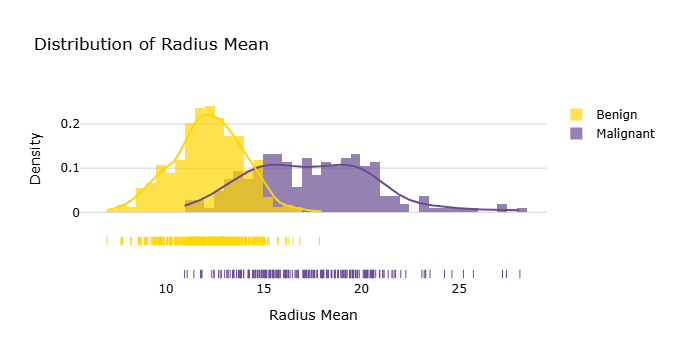

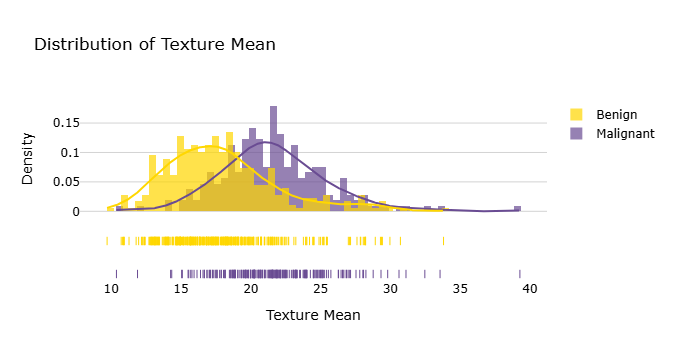

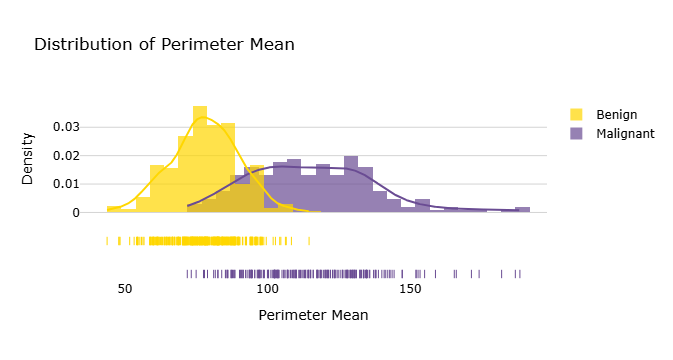

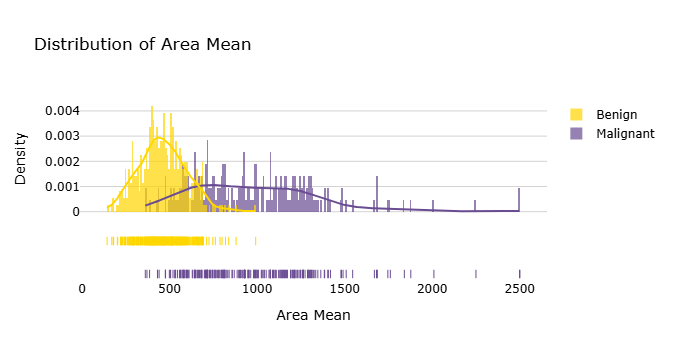

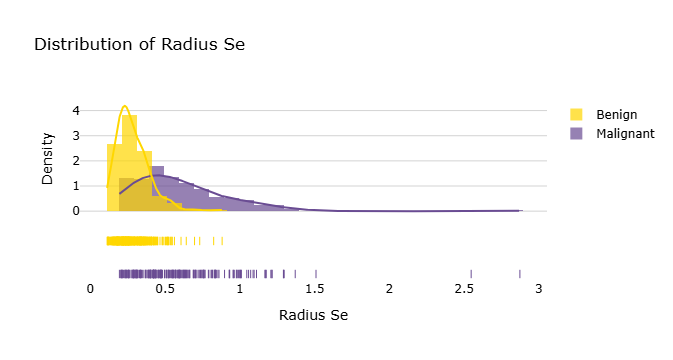

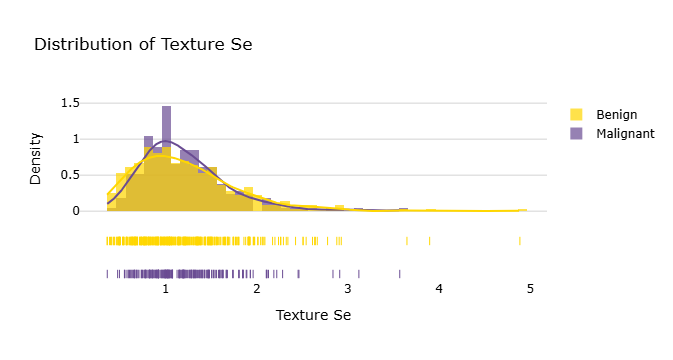

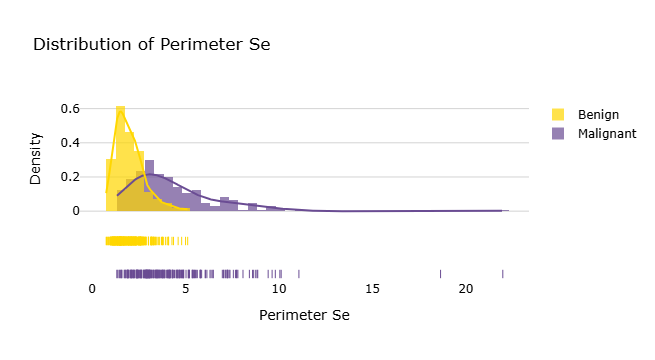

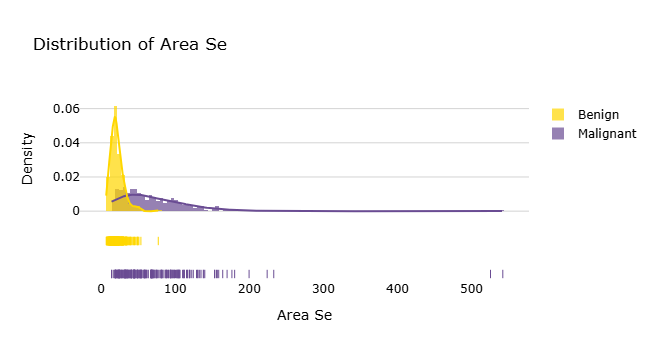

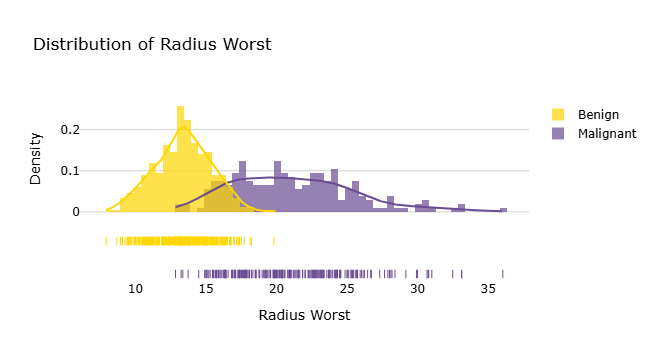

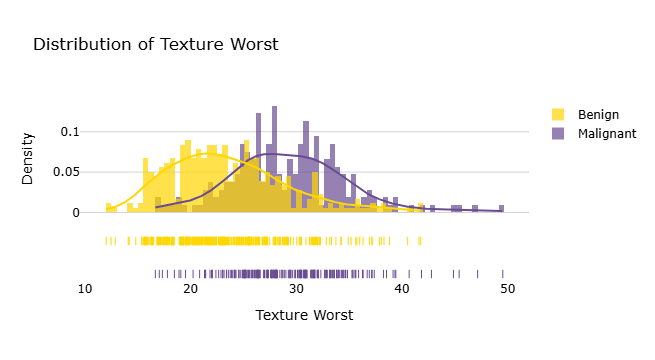

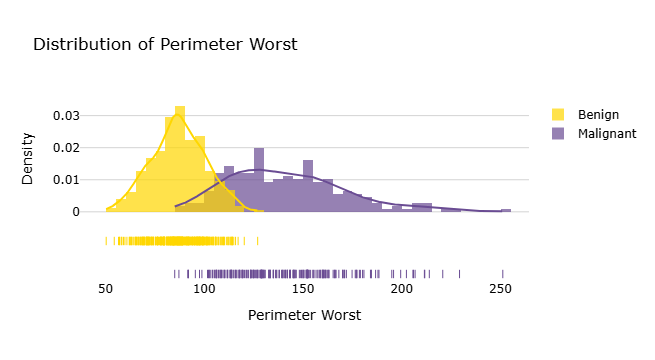

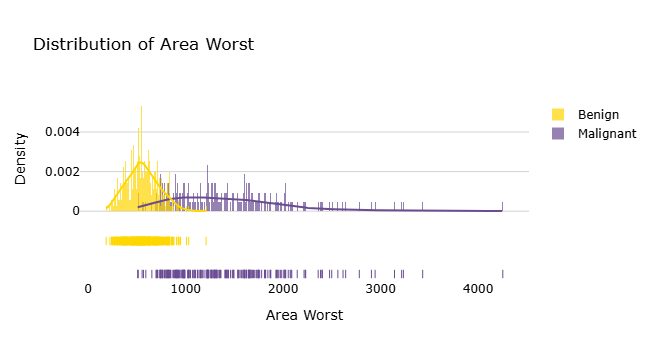

In [238]:
# Mean features
plot_distribution('radius_mean', 0.5)
plot_distribution('texture_mean', 0.5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)

# SE features
plot_distribution('radius_se', 0.1)
plot_distribution('texture_se', 0.1)
plot_distribution('perimeter_se', 0.5)
plot_distribution('area_se', 5)

# Worst features
plot_distribution('radius_worst', 0.5)
plot_distribution('texture_worst', 0.5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)


### Feature Correlation

We compute the Pearson correlation matrix to evaluate relationships between features. Strong correlations may indicate redundancy or mutual information.


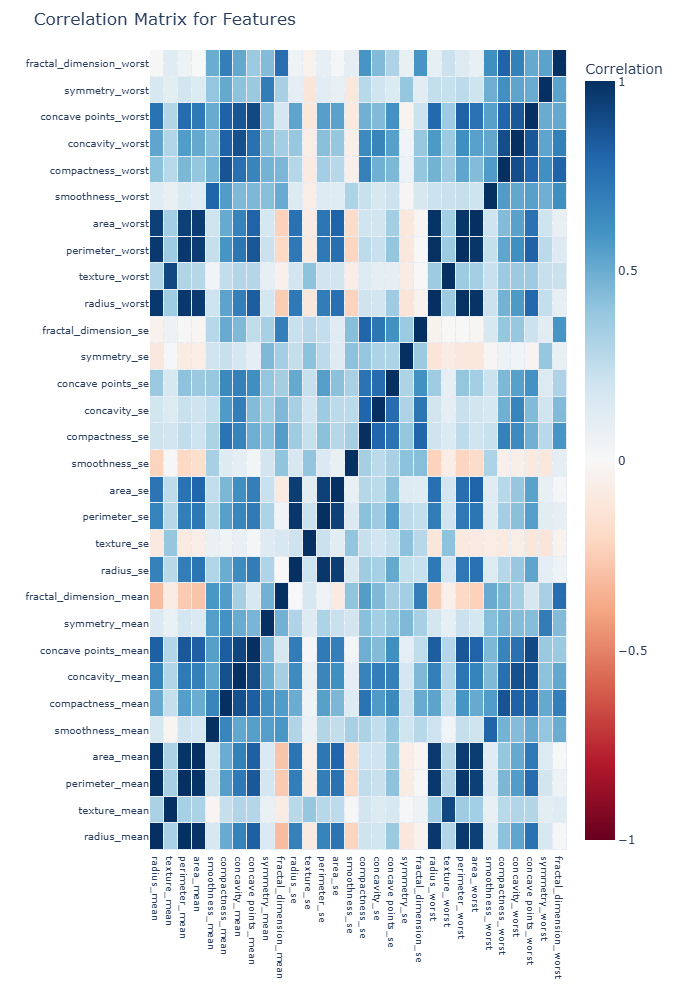

In [221]:
import numpy as np
import plotly.graph_objects as go

# Optional: drop 'id' column before computing correlations
correlation = df.drop(columns=['id']).corr(numeric_only=True)

# Prepare data
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)

# Create heatmap
trace = go.Heatmap(
    z=corr_array,
    x=matrix_cols,
    y=matrix_cols,
    xgap=1,
    ygap=1,
    colorscale='RdBu',  
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1  # Lock scale range for visual consistency
)

layout = go.Layout(
    title='Correlation Matrix for Features',
    autosize=False,
    height=1000,
    width=1200,
    margin=dict(r=0, l=150, t=50, b=150),
    yaxis=dict(tickfont=dict(size=10)),
    xaxis=dict(tickfont=dict(size=10))
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)


## Pairwise Feature Relationships by Diagnosis

We explore relationships between pairs of features using scatter plots, grouped by correlation type: positively correlated, uncorrelated, and negatively correlated. These visualizations reveal how feature interactions vary between malignant and benign tumors.


### Interactive Plotly Scatter Plot Function

The following function generates interactive 2D scatter plots using Plotly to compare two selected features, colored by diagnosis class.


In [171]:
M = df[df['diagnosis'] == 'M']
B = df[df['diagnosis'] == 'B']

In [239]:
def plot_feat1_feat2(feat1, feat2):  
    trace0 = go.Scatter(
        x=M[feat1],
        y=M[feat2],
        name='Malignant',
        mode='markers',
        marker=dict(
            color='#6A4C93',
            size=7,
            opacity=0.8,
            line=dict(width=1, color='black')
        )
    )

    trace1 = go.Scatter(
        x=B[feat1],
        y=B[feat2],
        name='Benign',
        mode='markers',
        marker=dict(
            color='#FFD700',
            size=7,
            opacity=0.8,
            line=dict(width=1, color='black')
        )
    )

    layout = dict(
    title=f'{feat1.replace("_", " ").title()} vs {feat2.replace("_", " ").title()}',
    xaxis=dict(
        title=feat1,
        zeroline=False,
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    ),
    yaxis=dict(
        title=feat2,
        zeroline=False,
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend=dict(bgcolor='white')
)


    fig = dict(data=[trace0, trace1], layout=layout)
    py.iplot(fig)


### Positively Correlated Feature Pairs

These scatter plots show feature pairs with strong positive correlation. In such cases, both features tend to increase together. Clear class separation can often be observed.

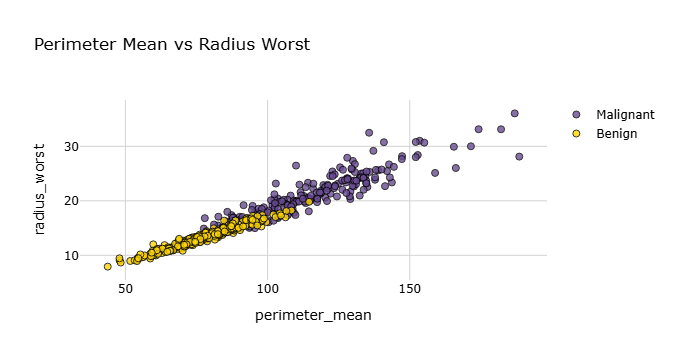

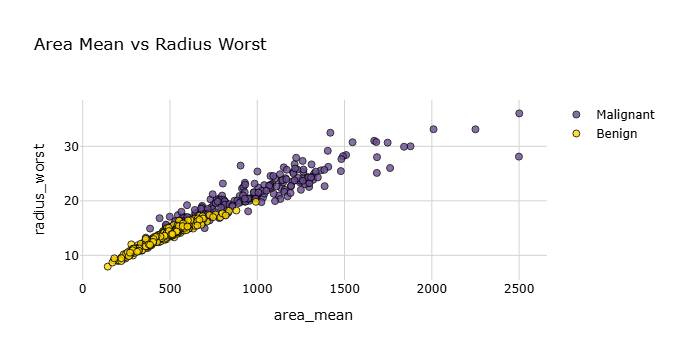

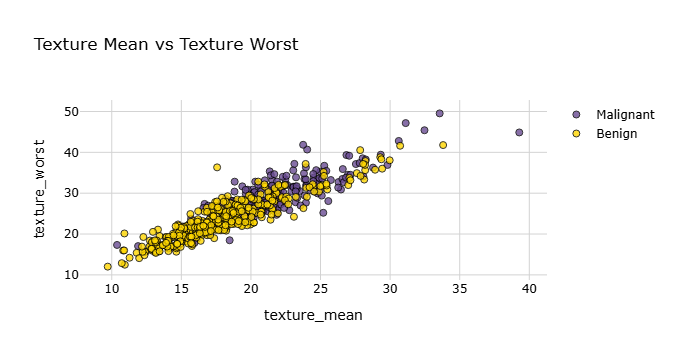

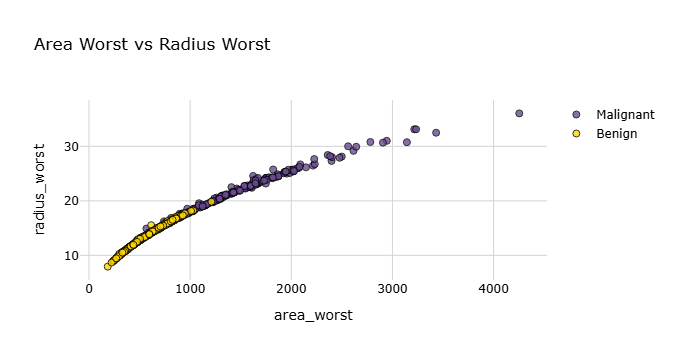

In [240]:
# Plotly interactive scatter plots
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

### Positively Correlated Feature Pairs (Static Seaborn View)

For comparison, we include a static 2x2 grid using Seaborn to show the same positively correlated features. This format is suitable for print and PDF presentation.

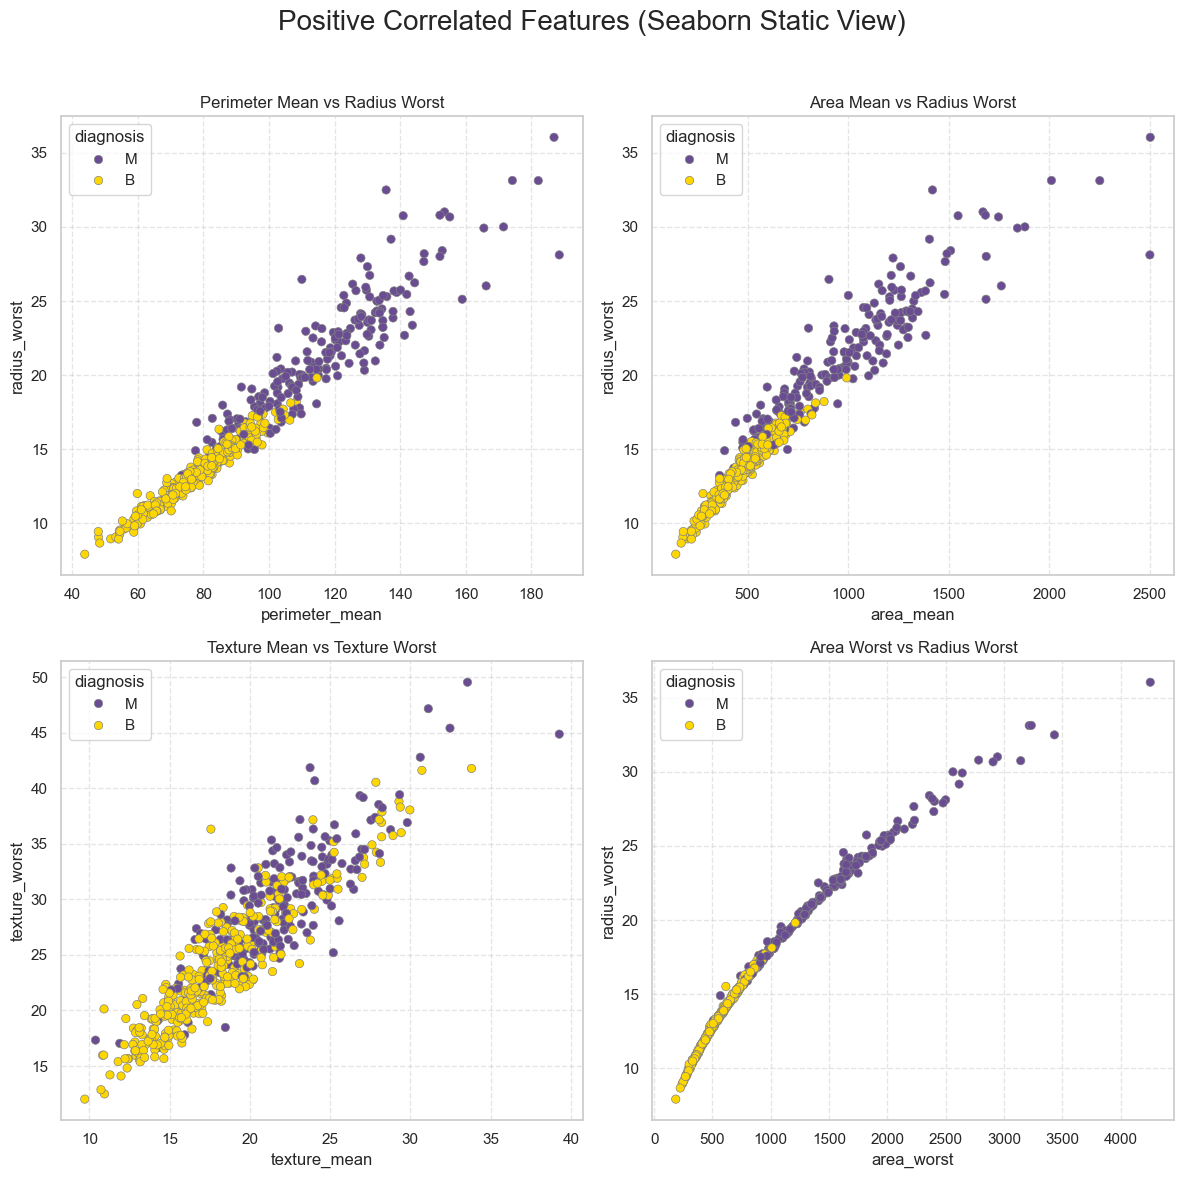

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated palette for diagnosis labels ('B' = benign, 'M' = malignant)
palette = {'B': '#FFD700', 'M': '#6A4C93'}
edgecolor = 'gray'

# Create a 2x2 grid of scatter plots
fig = plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.scatterplot(
    data=df,
    x='perimeter_mean',
    y='radius_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Perimeter Mean vs Radius Worst')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(222)
sns.scatterplot(
    data=df,
    x='area_mean',
    y='radius_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Area Mean vs Radius Worst')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(223)
sns.scatterplot(
    data=df,
    x='texture_mean',
    y='texture_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Texture Mean vs Texture Worst')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(224)
sns.scatterplot(
    data=df,
    x='area_worst',
    y='radius_worst',
    hue='diagnosis',
    palette=palette,
    edgecolor=edgecolor
)
plt.title('Area Worst vs Radius Worst')
plt.grid(True, linestyle='--', alpha=0.5)

# Super title
fig.suptitle('Positive Correlated Features (Seaborn Static View)', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # make space for suptitle

# Optional: Save to file
# plt.savefig('positive_correlated_features.png', dpi=300)

plt.show()


### Uncorrelated Features

In this section, we visualize feature pairs that exhibit little to no correlation. The purpose is to highlight variables that vary independently, which may contribute unique information for classification models.


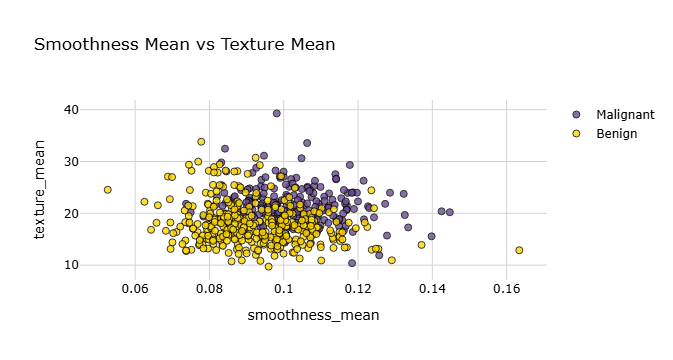

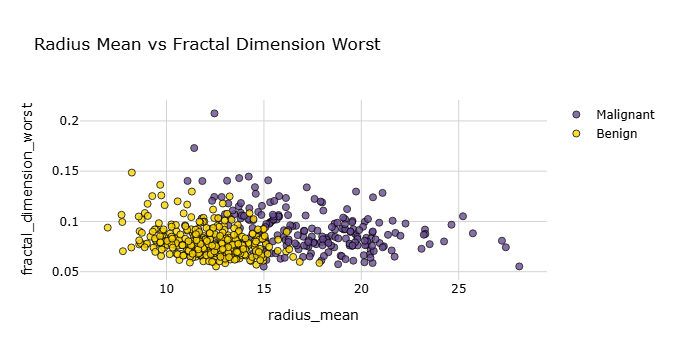

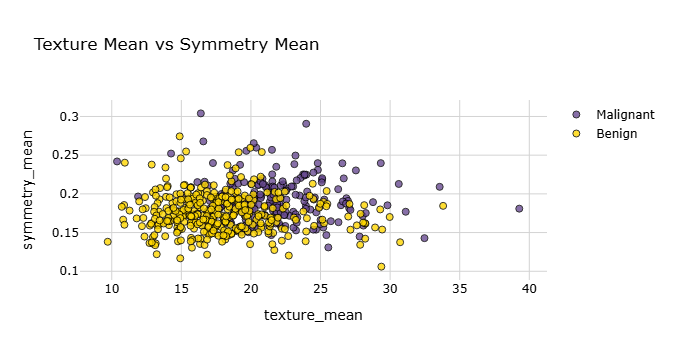

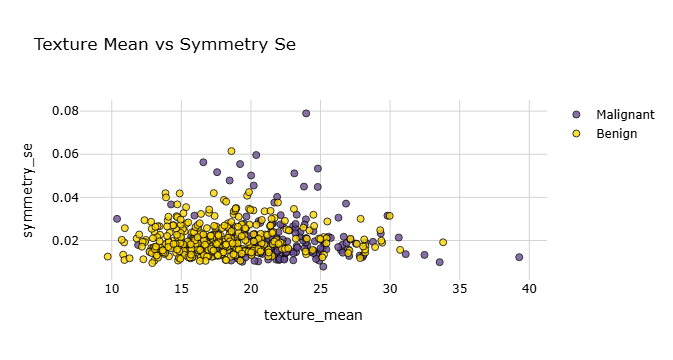

In [242]:
# Plot uncorrelated feature pairs using custom Plotly function
plot_feat1_feat2('smoothness_mean', 'texture_mean')
plot_feat1_feat2('radius_mean', 'fractal_dimension_worst')
plot_feat1_feat2('texture_mean', 'symmetry_mean')
plot_feat1_feat2('texture_mean', 'symmetry_se')


### Uncorrelated Feature Pairs (Static Seaborn View)

We present a static 2x2 grid using Seaborn to visualize pairs of features with low or no correlation. This layout helps highlight feature combinations where no clear linear or nonlinear relationship exists. The diagnostic classes are color-coded to reveal whether separation is still observable in uncorrelated feature spaces.

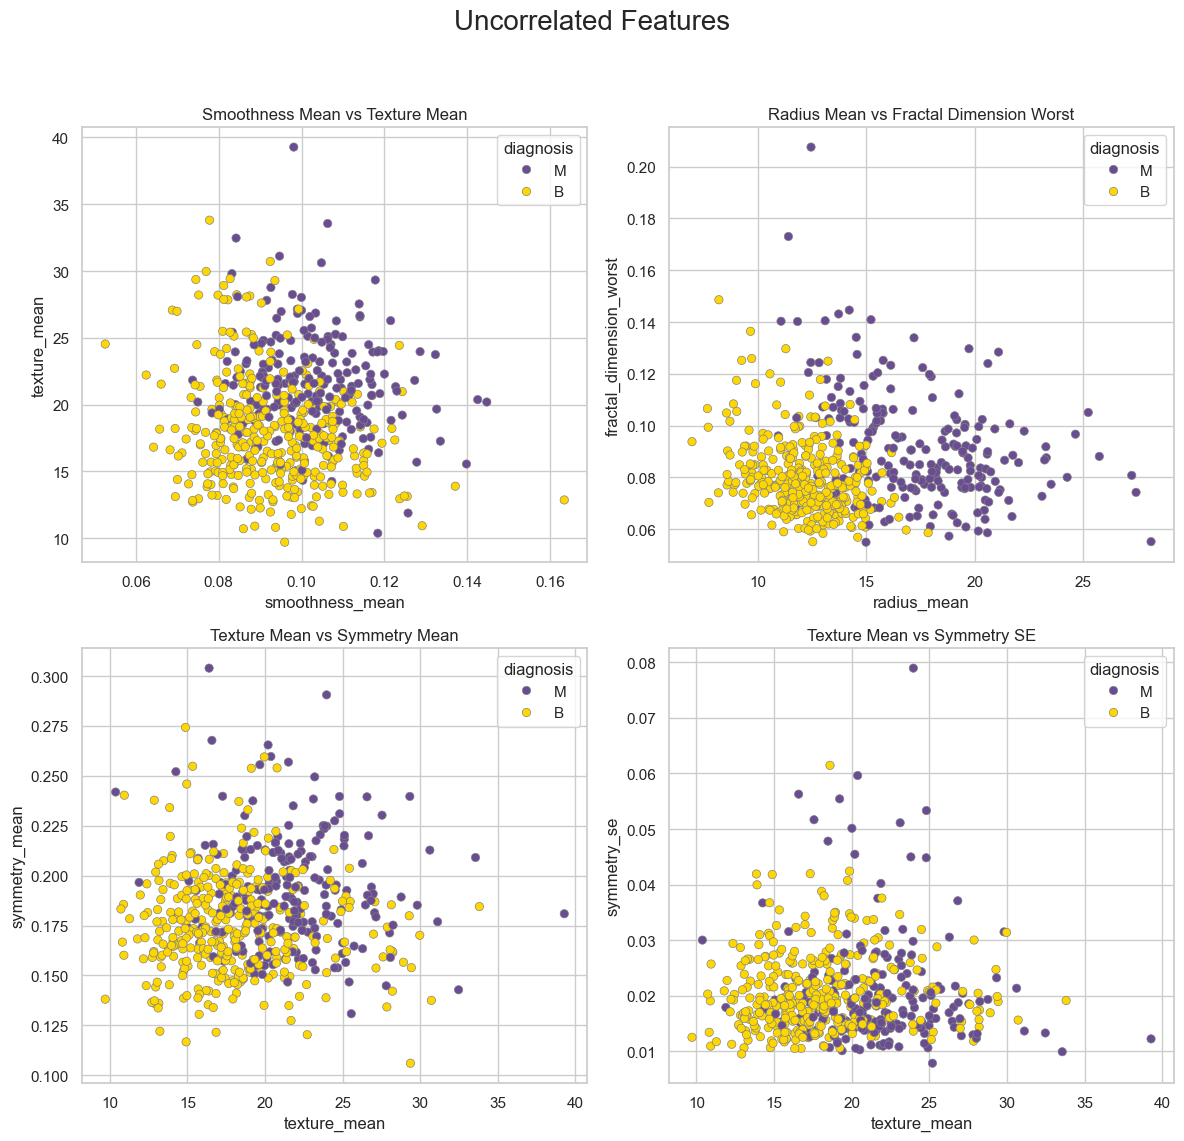

In [243]:
# Seaborn visualization: Uncorrelated feature pairs
palette = {"B": "#FFD700", "M": "#6A4C93"}
edgecolor = 'grey'

fig = plt.figure(figsize=(12, 12))

plt.subplot(221)
sns.scatterplot(x=df['smoothness_mean'], y=df['texture_mean'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Smoothness Mean vs Texture Mean')

plt.subplot(222)
sns.scatterplot(x=df['radius_mean'], y=df['fractal_dimension_worst'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Radius Mean vs Fractal Dimension Worst')

plt.subplot(223)
sns.scatterplot(x=df['texture_mean'], y=df['symmetry_mean'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Texture Mean vs Symmetry Mean')

plt.subplot(224)
sns.scatterplot(x=df['texture_mean'], y=df['symmetry_se'], hue=df['diagnosis'],
                palette=palette, edgecolor=edgecolor)
plt.title('Texture Mean vs Symmetry SE')

fig.suptitle('Uncorrelated Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('uncorrelated_features.png')
plt.show()


### Negatively Correlated Feature Pairs (Interactive View)

Below, we explore feature pairs that exhibit negative correlation — where an increase in one feature tends to be associated with a decrease in the other. Using interactive scatter plots, we can better understand how malignant and benign tumors distribute along these dimensions.

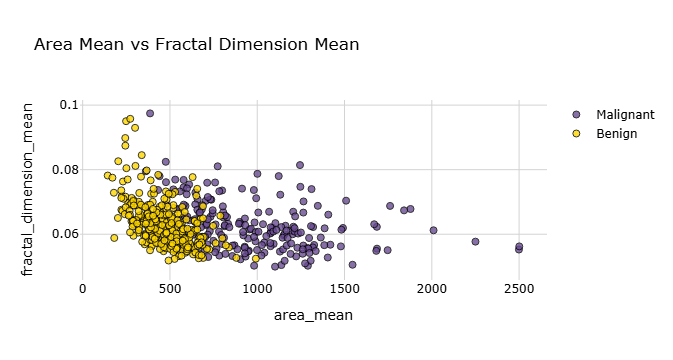

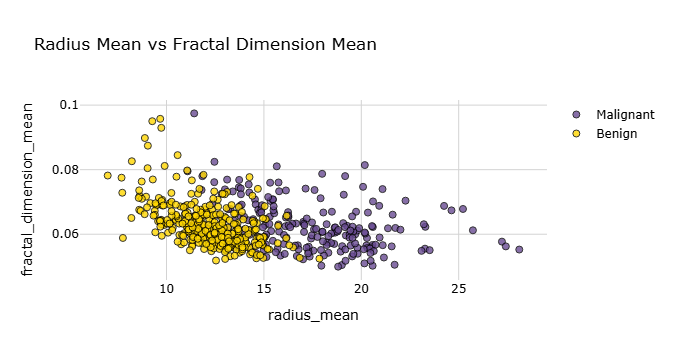

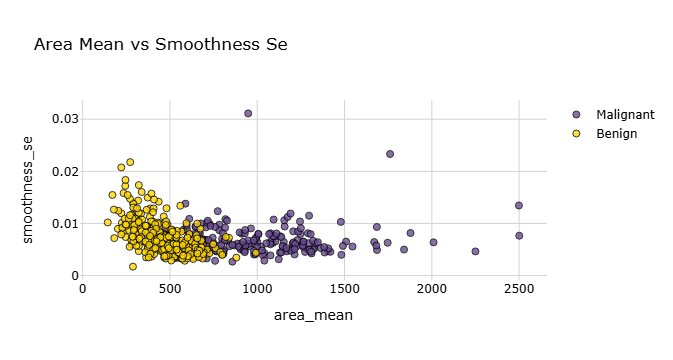

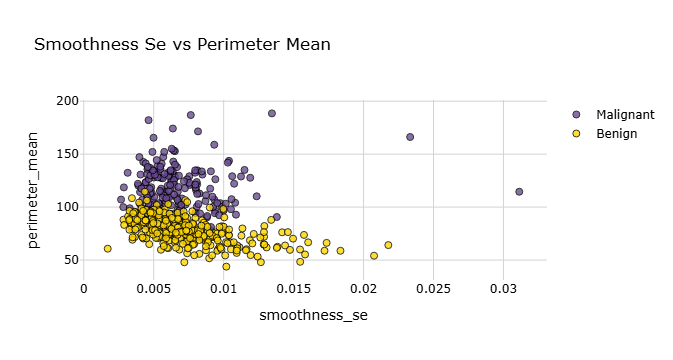

In [244]:
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

### Negatively Correlated Feature Pairs (Static Seaborn View)

This static 2x2 grid provides a visual representation of feature pairs that exhibit negative correlation. These inverse relationships can help identify features that behave differently across benign and malignant cases. The layout is especially suitable for static reporting formats such as PDF.

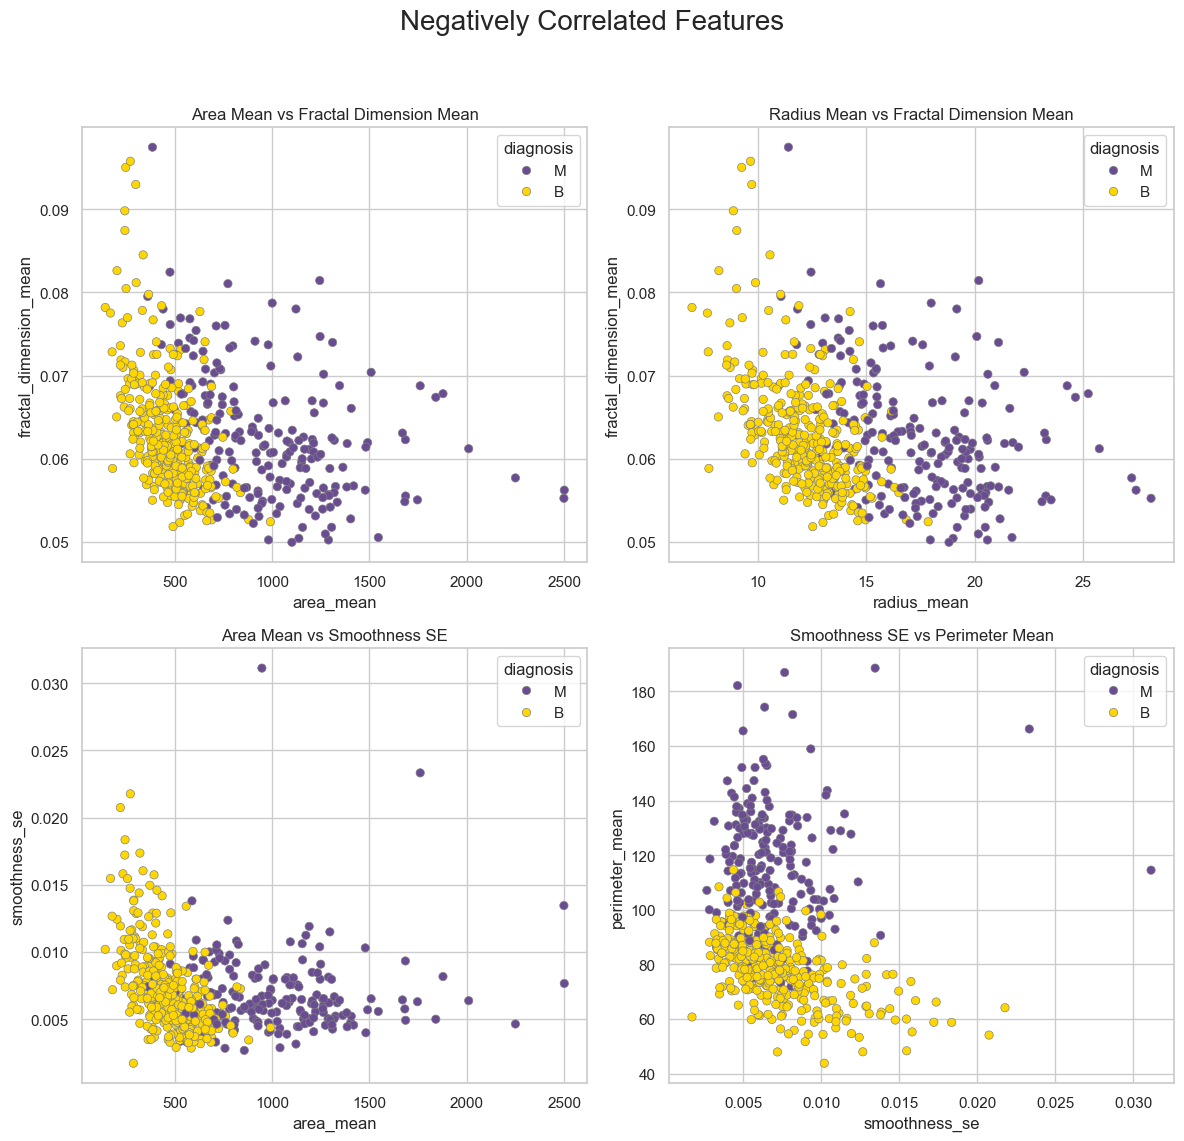

In [246]:
# Seaborn version – Negatively Correlated Feature Pairs
fig = plt.figure(figsize=(12, 12))

# Plot 1
plt.subplot(221)
sns.scatterplot(
    x=df['area_mean'], y=df['fractal_dimension_mean'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Area Mean vs Fractal Dimension Mean')

# Plot 2
plt.subplot(222)
sns.scatterplot(
    x=df['radius_mean'], y=df['fractal_dimension_mean'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Radius Mean vs Fractal Dimension Mean')

# Plot 3
plt.subplot(223)
sns.scatterplot(
    x=df['area_mean'], y=df['smoothness_se'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Area Mean vs Smoothness SE')

# Plot 4
plt.subplot(224)
sns.scatterplot(
    x=df['smoothness_se'], y=df['perimeter_mean'],
    hue=df['diagnosis'], palette=palette, edgecolor=edgecolor
)
plt.title('Smoothness SE vs Perimeter Mean')

# Super title and layout
fig.suptitle('Negatively Correlated Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('negatively_correlated_features.png', dpi=300)
plt.show()


### Data Preprocessing: Feature Selection and Scaling

Before proceeding with dimensionality reduction and machine learning, we perform essential preprocessing steps:

- **Drop Non-Informative Features**: The `id` column and any unnamed columns are removed as they do not contribute to the analysis.
- **Encode Target Variable**: The `diagnosis` column is encoded into binary format for compatibility with ML algorithms — `0` for Benign (B), `1` for Malignant (M).
- **Feature Scaling**: All numeric features are standardized using `StandardScaler` to ensure that each has a mean of 0 and a standard deviation of 1. This step is crucial for algorithms sensitive to feature magnitudes (e.g., PCA, SVM).

These preprocessing steps ensure consistency, improve model performance, and make the dataset suitable for further analysis.


In [286]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
# df = pd.read_csv('path_to_your_dataset.csv') 

#### Step 1: Drop Non-Informative Features

In [288]:
cols_to_drop = ['id', 'Unnamed: 32']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
dfFun = df.drop(columns=existing_cols_to_drop)

#### Step 2: Encode Target Variable


In [289]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
# 'B' becomes 0, 'M' becomes 1

#### Step 3: Feature Scaling
 Separate features and target variable

In [290]:
# Separate features and target variable
features = df.drop(columns=['diagnosis'])
target = df['diagnosis']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
features_scaled = scaler.fit_transform(features)

# Optionally, convert back to a DataFrame for easier interpretation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display first few rows of preprocessed data
print(features_scaled_df.head())

         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403     1.829821     -0.353632        1.685955   1.908708   
2  0.431741     1.579888      0.456187        1.566503   1.558884   
3  0.432121    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.359293 

### Classification Models on All Scaled Features
In this section, we apply a series of classification algorithms on the entire set of standardized features from the breast cancer dataset. The objective is to evaluate and compare the performance of several popular machine learning models when no dimensionality reduction (e.g., PCA) is applied. This allows us to:

Assess how well each model performs using all available diagnostic measurements.

Establish a performance benchmark using the full feature space.

Contrast these results later with models trained on transformed or reduced datasets (e.g., via PCA).

#### Step 1: Split the Dataset into Training and Test Sets
We separate the data into 70% training and 30% testing sets using train_test_split. This ensures the models are evaluated on unseen data for generalization.


In [280]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target
X = features_scaled_df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Step 2: Define the Classification Models
We use four commonly applied supervised learning algorithms: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, and Random Forest.

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}


#### Step 3: Train and Evaluate Each Model
Each model is trained on the training data and evaluated on the test set using accuracy_score and a detailed classification_report.

In [283]:
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store model performance
results_full = {}

# Train and evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} (All Features) ---")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    results_full[name] = acc


--- Logistic Regression (All Features) ---
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



--- K-Nearest Neighbors (All Features) ---
Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



--- Support Vector Machine (All Features) ---
Accuracy: 0.9766081871345029
Classification Report:
               precision    recall  f1-score   suppo

#### Step 4: Visualize Model Accuracy
We plot a bar chart to visually compare model accuracies. This complements the textual metrics and makes it easier to interpret performance.

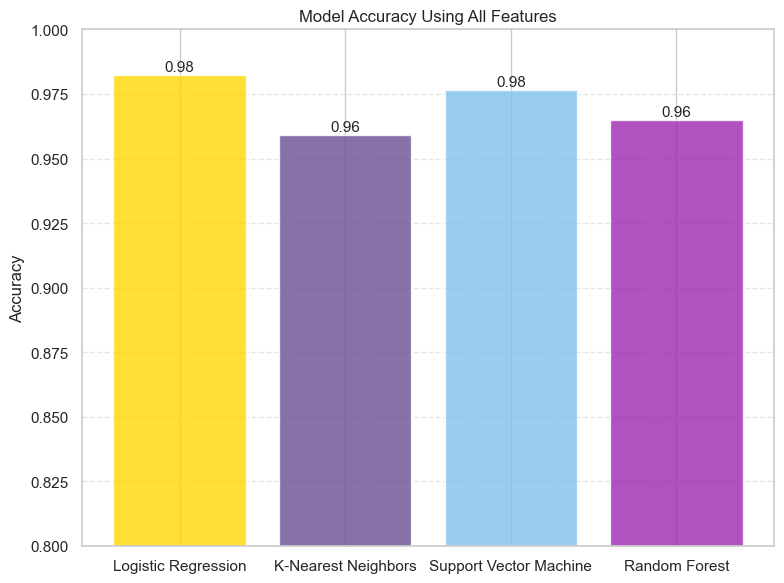

In [291]:
import matplotlib.pyplot as plt

# Plot model performance
plt.figure(figsize=(8, 6))
bars = plt.bar(results_full.keys(), results_full.values(),
               color=['#FFD700', '#6A4C93', '#7EC0EE', '#9C27B0'], alpha=0.8)
plt.title('Model Accuracy Using All Features')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

### PCA: Dimensionality Reduction and Visualization

Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset while preserving as much of its variance as possible. By transforming the original features into a smaller set of uncorrelated components, PCA facilitates both more efficient computation and clearer visual analysis — especially in high-dimensional spaces such as medical diagnostic data.

In this section, PCA is applied to:

Reveal underlying patterns in the data.

Visualize class separation (Benign vs. Malignant) in two dimensions.

Assess how much variance is captured by each principal component.

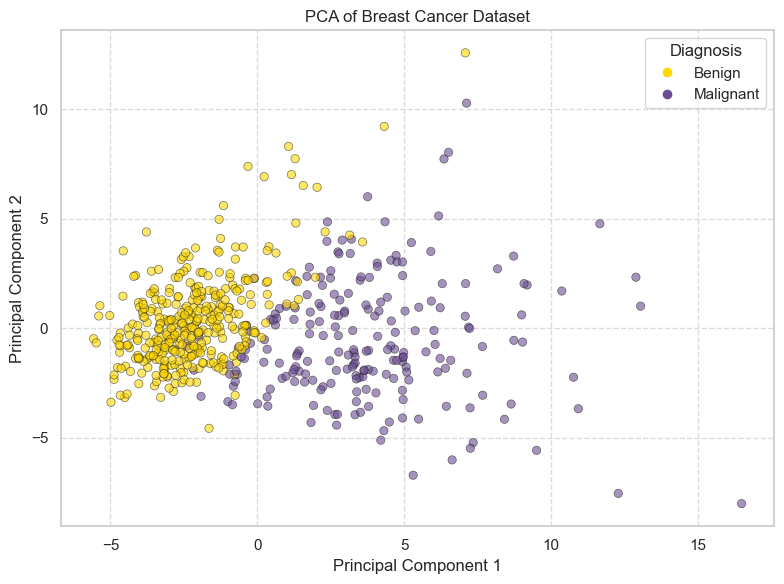

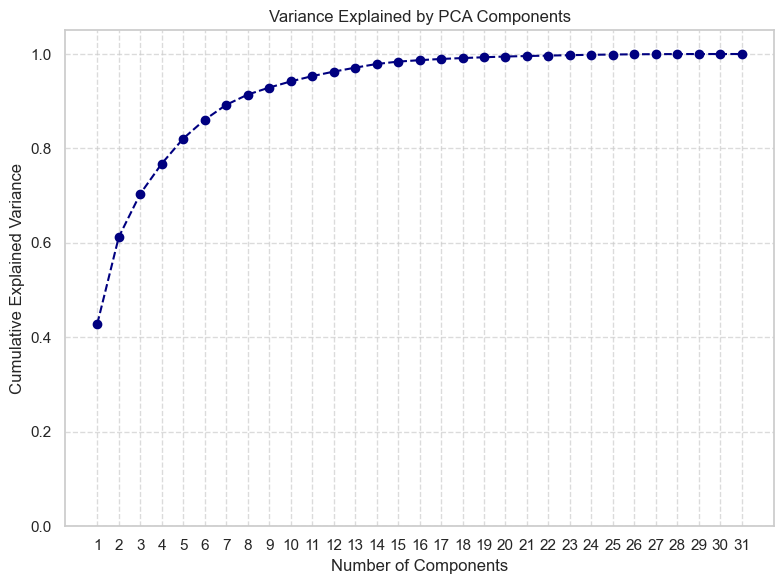

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create DataFrame with principal components and diagnosis label
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df['diagnosis'].values

# Define custom colors: Yellow for Benign (0), Purple for Malignant (1)
colors = ['#FFD700' if label == 0 else '#6A4C93' for label in pca_df['diagnosis']]

# Plot PCA scatter
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=colors,
    alpha=0.6,
    edgecolor='k',
    linewidth=0.5
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.grid(True, linestyle='--', alpha=0.7)

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Benign',
           markerfacecolor='#FFD700', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Malignant',
           markerfacecolor='#6A4C93', markersize=8)
]
plt.legend(handles=legend_elements, title='Diagnosis')
plt.tight_layout()
plt.show()

# Plot cumulative explained variance
pca_full = PCA()
pca_full.fit(features_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(
    np.arange(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    linestyle='--',
    color='navy'
)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.xticks(np.arange(1, len(cumulative_variance) + 1))
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Classification Using PCA-Reduced Features

After reducing the dataset to two principal components, we evaluate how well different classifiers perform using these compressed representations. While dimensionality reduction simplifies data, it may affect model performance, which we assess here.

We use four models:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Random Forest

Each model is trained on the two-component PCA-transformed features, and its performance is reported and visualized.


 #### Import libraries

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


### Prepare data

In [264]:
# Prepare PCA input and target
X_pca = principal_components  # Already reduced to 2 components
y_pca = df['diagnosis']       # 0 = Benign, 1 = Malignant

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)


### Define models

In [266]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}


### Train and Evaluate

In [268]:
# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    results[name] = acc


--- Logistic Regression ---
Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



--- K-Nearest Neighbors ---
Accuracy: 0.9532163742690059
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



--- Support Vector Machine ---
Accuracy: 0.935672514619883
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.9

### Visualize Accuracy

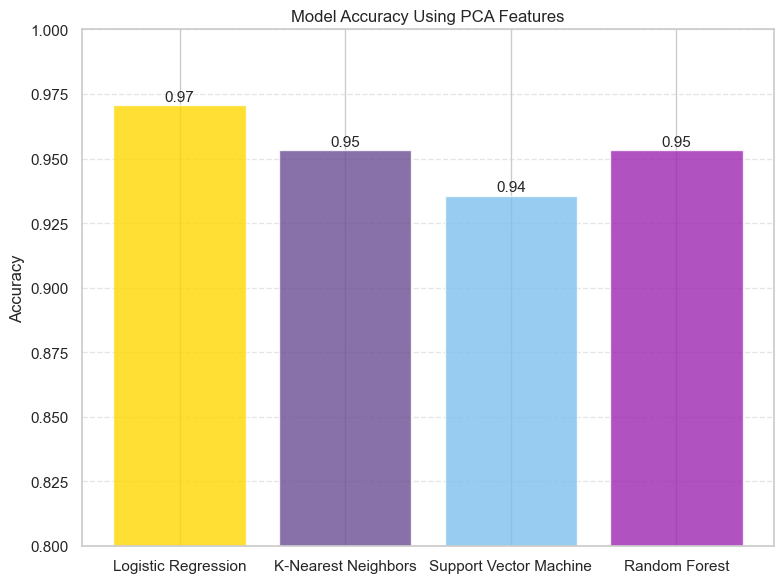

In [271]:
# Plot model accuracy
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color=['#FFD700', '#6A4C93', '#7EC0EE', '#9C27B0'], alpha=0.8)
plt.title('Model Accuracy Using PCA Features')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate accuracy on bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=11)

plt.tight_layout()
plt.show()
